In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/recomendacao/movies_small.csv")

In [ ]:
movies.shape

(9742, 3)

In [ ]:
ratings = pd.read_csv("/content/drive/MyDrive/recomendacao/ratings_small.csv")

In [ ]:
!pip install recmetrics -q

In [ ]:
!python -m pip uninstall matplotlib -q
!pip install matplotlib==3.1.3 -q

Proceed (Y/n)? y
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
recmetrics 0.1.5 requires matplotlib<4.0.0,>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
import recmetrics
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


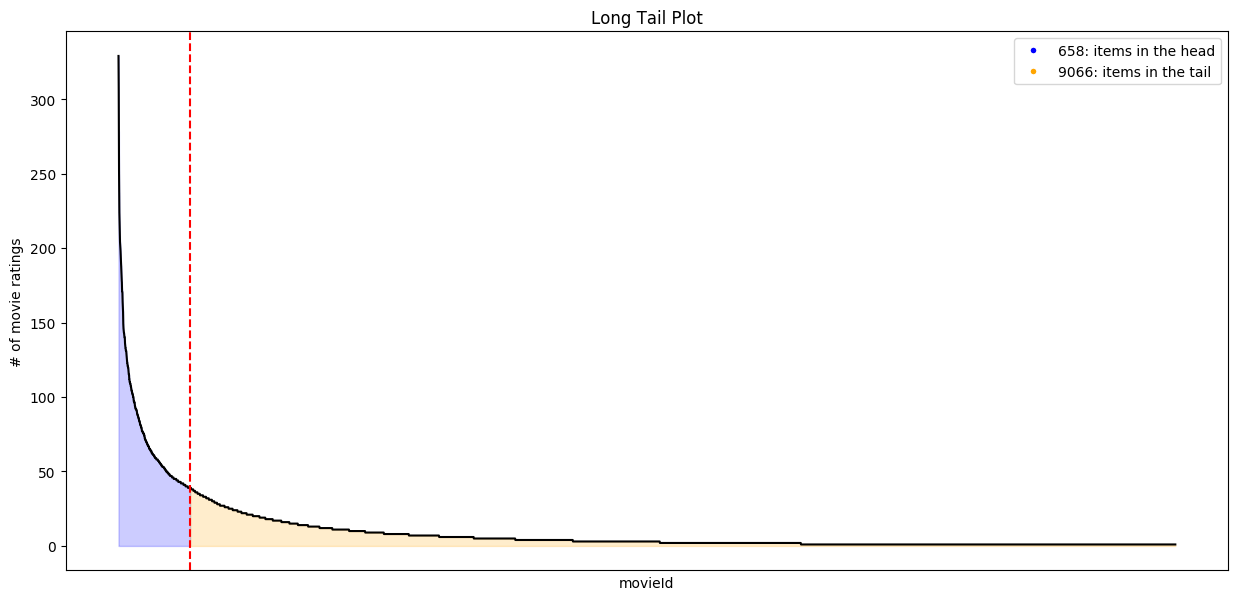

In [ ]:
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=ratings, 
             item_id_column="movieId", 
             interaction_type="movie ratings", 
             percentage=0.5,
             x_labels=False)

In [ ]:
ratings.userId.nunique()

610

In [ ]:
ratings.movieId.nunique()

9724

In [ ]:
filmes_ratings = list(ratings.movieId.unique())

In [ ]:
movies = movies[movies["movieId"].isin(filmes_ratings)]

In [ ]:
ratings.shape

In [ ]:
movies = movies.set_index("movieId")

In [ ]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Informações Estatísticas
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Primeira Tentativa de Recomendação

In [ ]:
total_votos = ratings["movieId"].value_counts()

In [ ]:
movies["total_votos"] = total_votos

In [ ]:
movies.sort_values(by = "total_votos", ascending = False)

,title,genres,total_votos
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
318,"Shawshank Redemption, The (1994)",Crime|Drama,317
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278
...,...,...,...
4093,Cop (1988),Thriller,1
4089,Born in East L.A. (1987),Comedy,1
58351,City of Men (Cidade dos Homens) (2007),Drama,1


In [ ]:
notas_medias = ratings.groupby("movieId").mean()["rating"]

In [ ]:
movies["nota_media"] = notas_medias

In [ ]:
movies.sort_values("nota_media", ascending = False)

,title,genres,total_votos,nota_media
movieId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1,5.0
100556,"Act of Killing, The (2012)",Documentary,1,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1,5.0
143511,Human (2015),Documentary,1,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1,5.0
...,...,...,...,...
157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,1,0.5
85334,Hard Ticket to Hawaii (1987),Action|Comedy,1,0.5
53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,1,0.5


In [ ]:
movies.query("total_votos >= 50").sort_values("nota_media", ascending = False).head(10)

,title,genres,total_votos,nota_media
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
1276,Cool Hand Luke (1967),Drama,57,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
904,Rear Window (1954),Mystery|Thriller,84,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107,4.252336
1213,Goodfellas (1990),Crime|Drama,126,4.250000


In [ ]:
movies_filter = movies.query("total_votos >= 50").sort_values("nota_media", ascending = False)

## Aplicando Distância

In [ ]:
user_1 = ratings[ratings["userId"] == 1]
user_1 = user_1[["movieId", "rating"]].set_index("movieId")
#outro user
user_4 = ratings[ratings["userId"] == 4]
user_4 = user_4[["movieId", "rating"]].set_index("movieId")

In [ ]:
user_1

,rating
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
user_4

,rating
movieId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0
...,...
4765,5.0
4881,3.0
4896,4.0


In [ ]:
diferencas = user_1.join(user_4, lsuffix="_left", rsuffix="_rigth").dropna()

In [ ]:
diferencas 

,rating_left,rating_rigth
movieId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [ ]:
np.linalg.norm(diferencas["rating_left"] - diferencas["rating_rigth"])

11.135528725660043

In [ ]:
def calculo_distancia(user1,user2):
  user_1 = ratings[ratings["userId"] == user1]
  user_1 = user_1[["movieId", "rating"]].set_index("movieId")
  user_2 = ratings[ratings["userId"] == user2]
  user_2 = user_2[["movieId", "rating"]].set_index("movieId")
  diferencas = user_1.join(user_2, lsuffix="_left", rsuffix="_rigth").dropna()
  distancia = np.linalg.norm(diferencas["rating_left"] - diferencas["rating_rigth"])
  return [user1, user2, distancia]

In [ ]:
calculo_distancia(1,3)

[1, 3, 8.200609733428363]

# Como generalizar

In [ ]:
def todas_distancias(userid):
    all_users = ratings["userId"].unique()
    distancias = [calculo_distancia(userid, outro_user_id) for outro_user_id in all_users]
    return distancias

In [ ]:
#Calculando distância de todos por mim
todas_distancias(1)[:10]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413],
 [1, 6, 8.602325267042627],
 [1, 7, 7.106335201775948],
 [1, 8, 3.7416573867739413],
 [1, 9, 1.0],
 [1, 10, 7.858116822750856]]

In [ ]:
def todas_distancias(userid):
    all_users = ratings["userId"].unique()
    distancias = [calculo_distancia(userid, outro_user_id) for outro_user_id in all_users]
    distancias_df = pd.DataFrame(distancias, columns = ["User_alvo", "Outros_users", "distancia"])
    distancias_df.drop(index=0, inplace=True)
    return distancias_df

In [ ]:
todas_distancias(1).sort_values(by="distancia")

,User_alvo,Outros_users,distancia
305,1,306,0.000000
577,1,578,0.000000
555,1,556,0.000000
76,1,77,0.000000
84,1,85,0.000000
...,...,...,...
473,1,474,18.594354
159,1,160,18.794946
216,1,217,19.646883
598,1,599,19.665960


## Outras medidas a tomar

- Vão aparecer dataframes vazios
- Tomar cuidado para não recomendar itens de nicho
- Sugerir baseando-se em varios usuários